### Design of IIR Butterworth Filter using BLT

##### Problem Statement: Design Digital Butterworth Filter for following specifications using Bilinear Transformation. Assume T = 1sec
##### Specifications:
##### 0.8 <= |H(e^jw| <= 1         0 <= w <= 0.2pi
#####        |H(e^jw| <= 0.2       0.5 <= w <= pi

In [1]:
# Importing in-built libraries
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as control
import scipy.signal as signal

In [2]:
# Given data
T = 1
d1 = 0.8
d2 = 0.2
wp = 0.2 * np.pi
ws = 0.5 * np.pi
print(wp)
print(ws)

0.6283185307179586
1.5707963267948966


In [3]:
d1db = -20 * np.log10(d1)
d2db = -20 * np.log10(d2)

In [4]:
# Frequency Mapping
omegap = (2/T) * np.tan(wp/2)
omegas = (2/T) * np.tan(ws/2)
print(omegap)
print(omegas)

0.6498393924658126
1.9999999999999998


In [5]:
# Determining Order of the Filter
N,wc = signal.buttord(omegap, omegas, d1db, d2db, analog=True)
print('Order of Filter = ', N)
print(wc)

Order of Filter =  2
0.7503698963403195


In [6]:
# Determining Analog T.F H(s)
num,den = signal.butter(N, wc, btype = 'lowpass', analog = True)
trans1 = control.tf(num,den)
print('Analog Transfer Function of Butterworth filter H(s) = ', trans1)

Analog Transfer Function of Butterworth filter H(s) =  
        0.5631
----------------------
s^2 + 1.061 s + 0.5631


In [7]:
# Transforming Analog Filter to Digital Filter using BLT
num1, den1 = signal.bilinear(num, den, T)
trans2 = control.tf(num1, den1)
print('Digital Transfer Function of Butterworth filter H(z) = ', trans2)

Digital Transfer Function of Butterworth filter H(z) =  
0.08422 s^2 + 0.1684 s + 0.08422
--------------------------------
     s^2 - 1.028 s + 0.3651


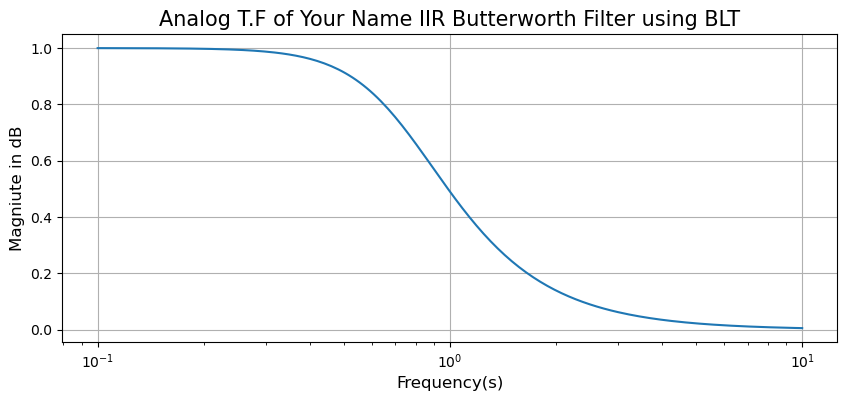

In [8]:
# Plotting Analog T.F
w, h = signal.freqs(num, den)
h_db = np.abs(h)
plt.figure(figsize = (10,4))
plt.grid()
plt.xlabel('Frequency(s)', fontsize=12)
plt.ylabel('Magniute in dB', fontsize=12)
plt.title('Analog T.F of Your Name IIR Butterworth Filter using BLT', fontsize=15)
plt.semilogx(w, h_db)
plt.show()

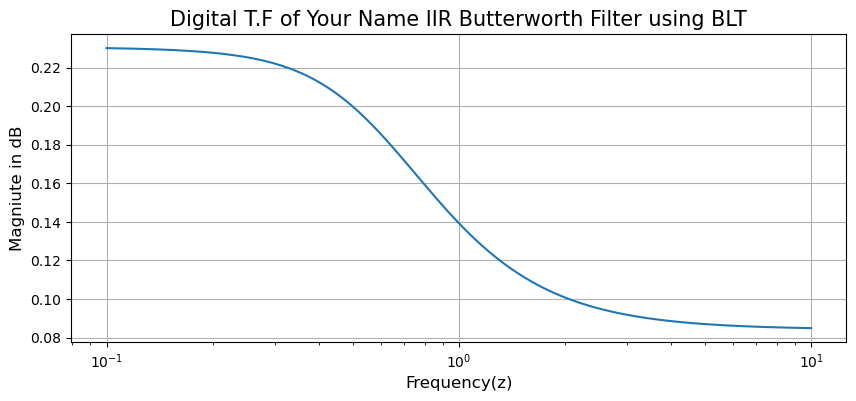

In [9]:
# Plotting Digital T.F
w1, h1 = signal.freqs(num1, den1)
h1_db = np.abs(h1)
plt.figure(figsize = (10,4))
plt.grid()
plt.xlabel('Frequency(z)', fontsize=12)
plt.ylabel('Magniute in dB', fontsize=12)
plt.title('Digital T.F of Your Name IIR Butterworth Filter using BLT', fontsize=15)
plt.semilogx(w1, h1_db)
plt.show()